In [1]:

# import libraries
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import matplotlib as mpl


# Read and Merge Data - basic - remove nan / duplicate values

In [2]:

# load the data for df_final_demo
pd.set_option('display.max_columns', None) 

df_final_demo = pd.read_csv('../Data/Cleaned/df_final_demo (1).txt')

# check for missing values
df_final_demo[df_final_demo.isnull().any(axis=1)]

# remove the missing values
df_final_demo = df_final_demo.dropna()

# remove gendr value X
df_final_demo = df_final_demo[df_final_demo['gendr'] != 'X']
df_final_demo['gendr'].value_counts()

df_final_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [4]:
# load the data for df_final_web_data

df_web_data1 = pd.read_csv('../Data/Cleaned/df_final_web_data_pt_1.txt')
df_web_data2 = pd.read_csv('../Data/Cleaned/df_final_web_data_pt_2.txt')
df_final_experiment = pd.read_csv('../Data/Cleaned/df_final_experiment_clients.txt')

# merge the data
df_web_data = pd.concat([df_web_data1, df_web_data2])

# check the duplicate
df_web_data.duplicated().sum()

# remove the duplicate
df_web_data = df_web_data.drop_duplicates()

#remove nan values for df_final_experiment
df_final_experiment = df_final_experiment.dropna()

#merge df_web_data and df_final_experiment
df_web_data = pd.merge(df_web_data, df_final_experiment, on='client_id', how='inner')

df_web_data.head(5)

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test


In [5]:
# merge all the data
df = pd.merge(df_web_data,df_final_demo, on='client_id', how='left')

# make all columns lowercase
df.columns = df.columns.str.lower()
df.columns


Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time',
       'variation', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

#### In the dataframe df, the numerical variables are:

clnt_tenure_yr - discrete variables

clnt_tenure_mnth  - discrete variables

clnt_age - discrete variables

num_accts - discrete variables

calls_6_mnth - discrete variables

logons_6_mnth - discrete variables


bal - continuous variable 


#### The categorical variables are:

variation - nominal variable

gendr - ordinal variable

# EDA about demo dataset 


## Who are the primary clients using this online process?


## Are the primary clients younger or older, new or long-standing?

In [6]:
# create a dataframe for the demographic data
df_demo = df[['client_id', 'date_time', 'variation', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']]
df_demo.head(5)

# create two dataframes based on the variation
df_control = df_demo[df_demo['variation'] == 'Control']
df_test = df_demo[df_demo['variation'] == 'Test']

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

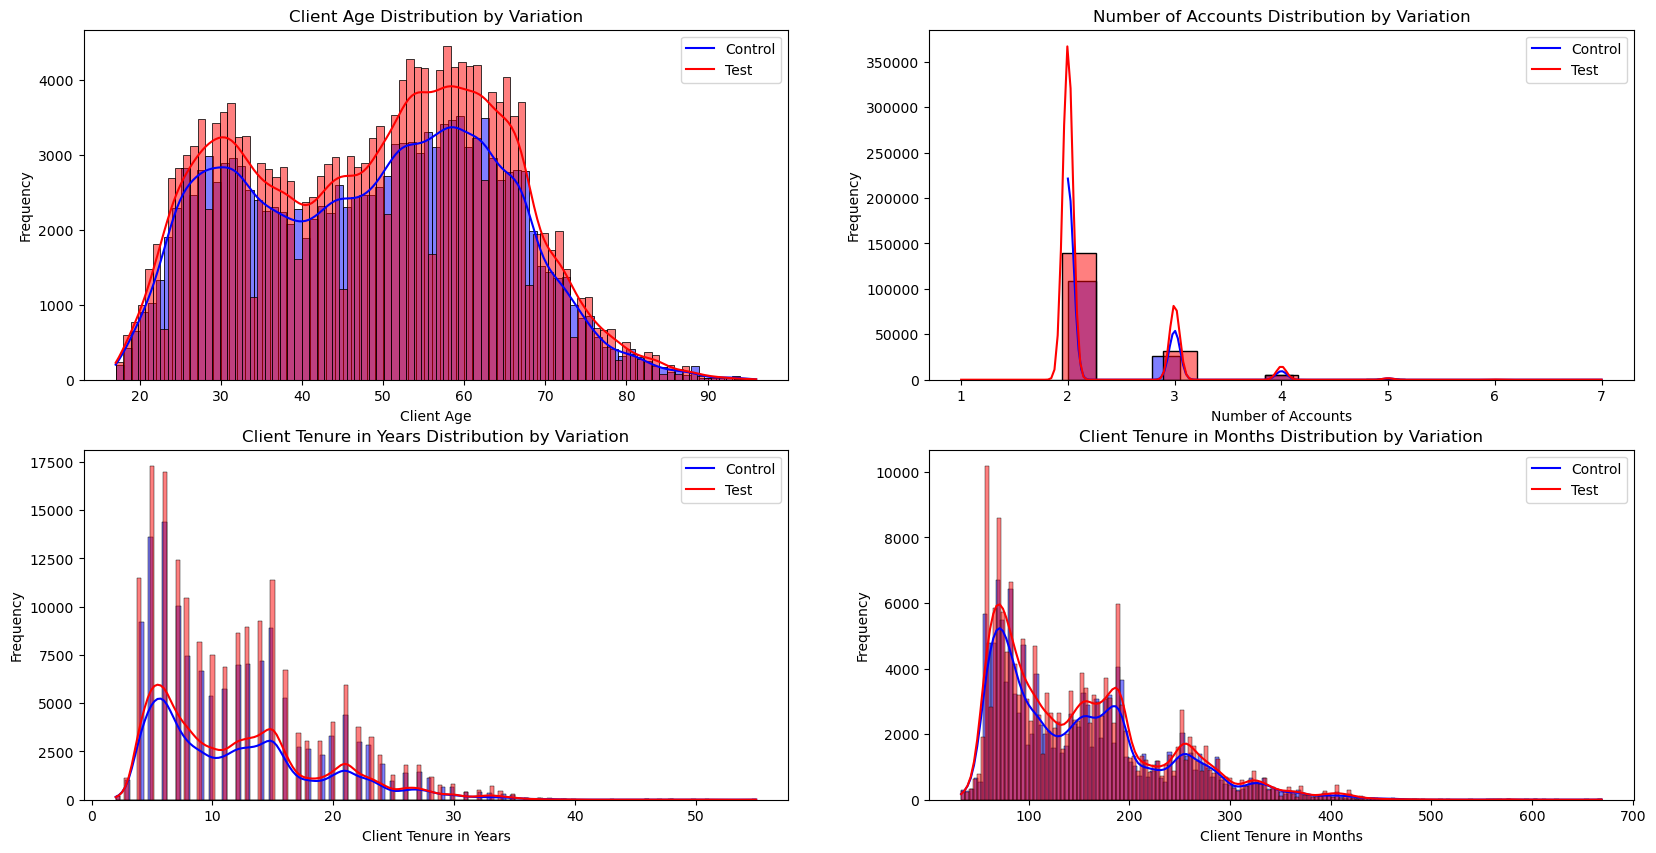

In [7]:
# using stacked histogram to compare the difference between the two groups, for clnt_age and num_accts, and clin_tenure_yr, clnt_tenure_mnth

fig, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.histplot(df_control['clnt_age'], kde=True, ax=axes[0, 0], color='blue', alpha=0.5)
sns.histplot(df_test['clnt_age'], kde=True, ax=axes[0, 0], color='Red', alpha=0.5)

sns.histplot(df_control['num_accts'], kde=True, ax=axes[0, 1], color='blue', alpha=0.5)
sns.histplot(df_test['num_accts'], kde=True, ax=axes[0, 1], color='red', alpha=0.5)

sns.histplot(df_control['clnt_tenure_yr'], kde=True, ax=axes[1, 0], color='blue', alpha=0.5)
sns.histplot(df_test['clnt_tenure_yr'], kde=True, ax=axes[1, 0], color='red', alpha=0.5)

sns.histplot(df_control['clnt_tenure_mnth'], kde=True, ax=axes[1, 1], color='blue', alpha=0.5)
sns.histplot(df_test['clnt_tenure_mnth'], kde=True, ax=axes[1, 1], color='red', alpha=0.5)
             
# add labels

axes[0, 0].set_xlabel('Client Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Client Age Distribution by Variation')

axes[0, 1].set_xlabel('Number of Accounts')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Number of Accounts Distribution by Variation')

axes[1, 0].set_xlabel('Client Tenure in Years')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Client Tenure in Years Distribution by Variation')

axes[1, 1].set_xlabel('Client Tenure in Months')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Client Tenure in Months Distribution by Variation')

# add legend

axes[0, 0].legend(['Control', 'Test'])
axes[0, 1].legend(['Control', 'Test'])
axes[1, 0].legend(['Control', 'Test'])
axes[1, 1].legend(['Control', 'Test'])


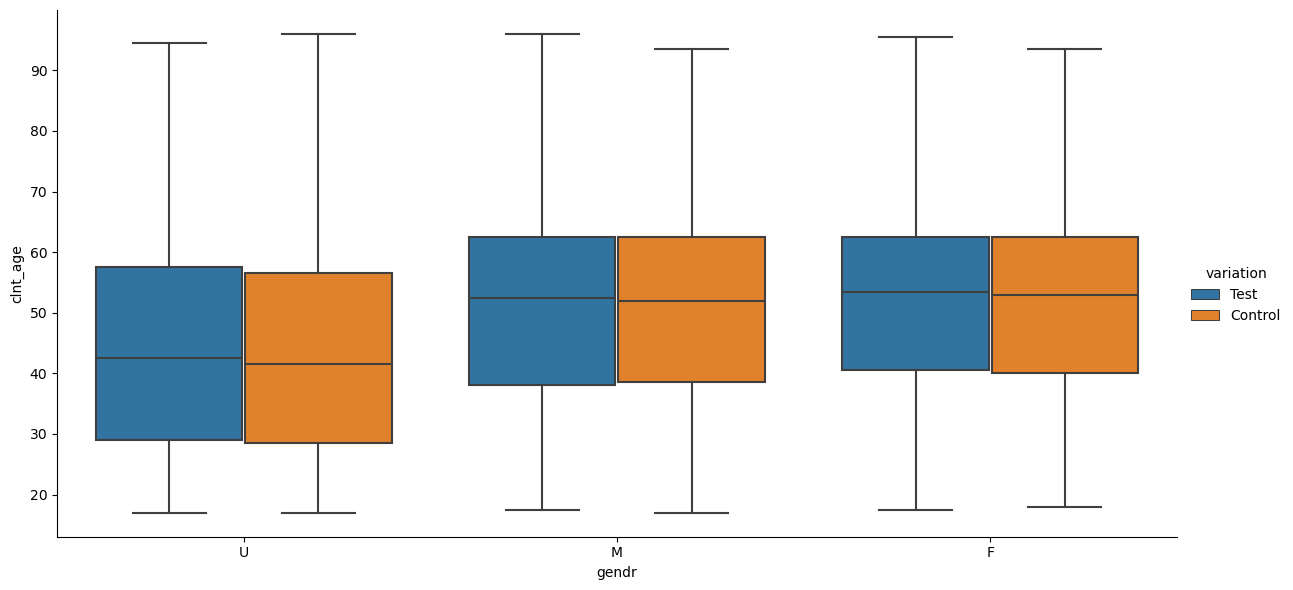

In [8]:
# use catplot to show the age distribution by variation
sns.catplot(x='gendr', y='clnt_age', hue='variation', data=df, kind='box', height=6, aspect=2)

### CLIENT AGE AND VARIANCE ANALYSIS

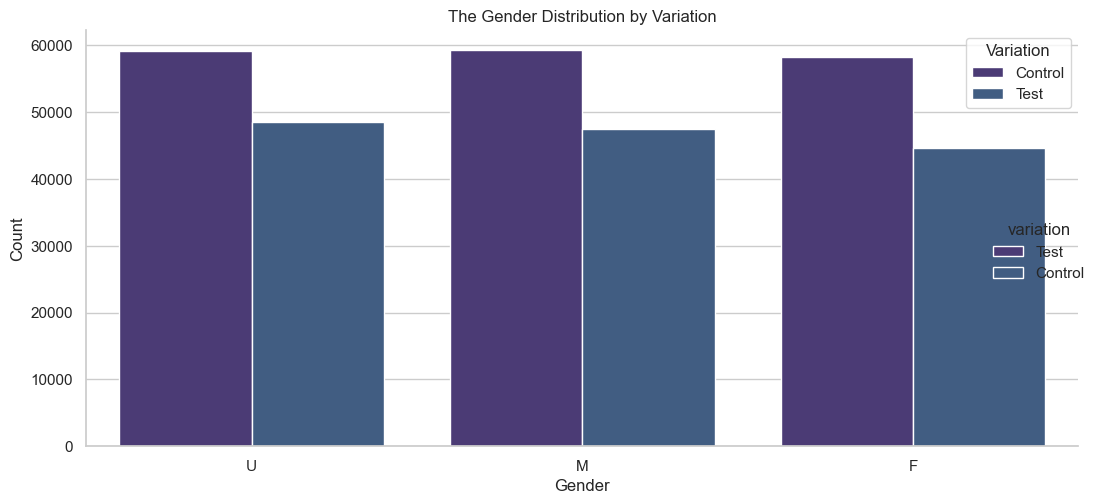

In [9]:
# create a grouped bar chart to compare gender distribution by variation

sns.set_theme(style="whitegrid", palette='viridis')
sns.catplot(x='gendr', kind='count', hue='variation', data=df_demo, height=5, aspect=2)

# add labels
plt.xlabel('Gender')
plt.ylabel('Count')
# make visual tight
plt.tight_layout()

# add title
plt.title('The Gender Distribution by Variation')

# add legend
plt.legend(title='Variation', loc='upper right', labels=['Control', 'Test'])



In [10]:
# create a cross tab for the gender and variation
gendr_variation = pd.crosstab(df_demo['gendr'], df_demo['variation'])
gendr_variation

# compute the probability of the age and variation
gendr_variation['prob_control'] = gendr_variation['Control'] / gendr_variation['Control'].sum()
gendr_variation['prob_test'] = gendr_variation['Test'] / gendr_variation['Test'].sum()

# use chi-square test to determine if the age and variation are independent
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(gendr_variation[['Control', 'Test']])
p


8.757114930897778e-13

In [11]:
# explain the result
if p < 0.05:
    print('There is a significant difference between the age and variation')
else:
    print('There is no significant difference between the age and variation')

There is a significant difference between the age and variation


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

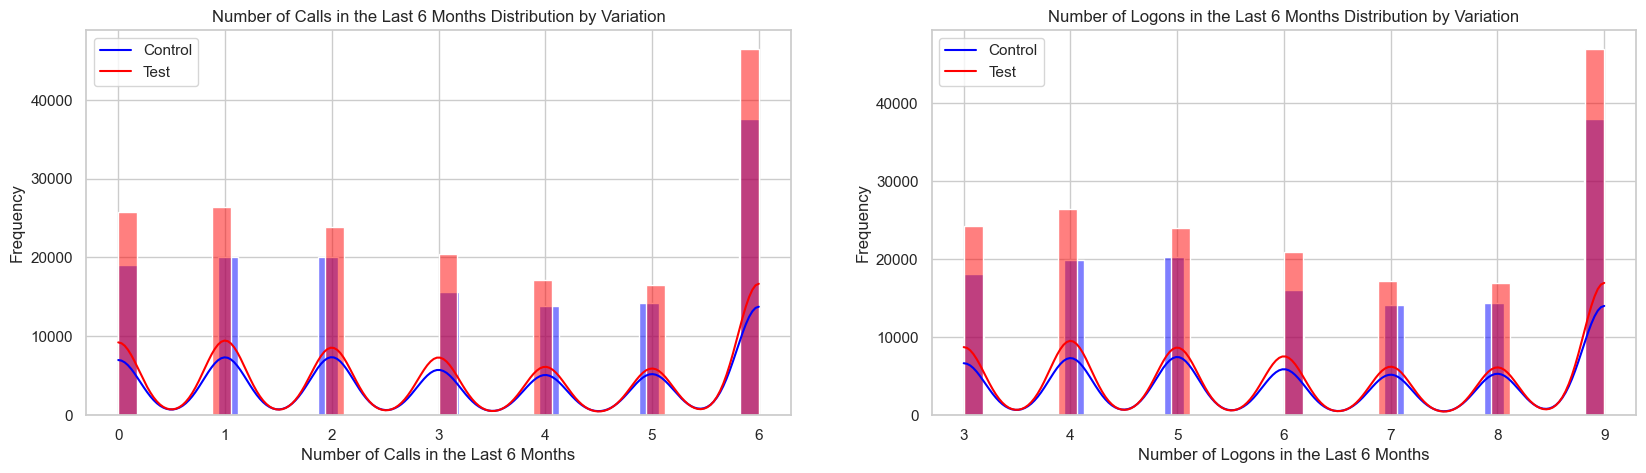

In [13]:
# calls_6_mnth: Records the number of times the client reached out over a call in the past six months.
# logons_6_mnth: Reflects the frequency with which the client logged onto Vanguard’s platform over the last six months.

#using displot to compare the difference between the two groups, for calls_6_mnth and logons_6_mnth
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(df_control['calls_6_mnth'], kde=True, ax=axes[0], color='blue', alpha=0.5)
sns.histplot(df_test['calls_6_mnth'], kde=True, ax=axes[0], color='red', alpha=0.5)

sns.histplot(df_control['logons_6_mnth'], kde=True, ax=axes[1], color='blue', alpha=0.5)
sns.histplot(df_test['logons_6_mnth'], kde=True, ax=axes[1], color='red', alpha=0.5)

# add labels
axes[0].set_xlabel('Number of Calls in the Last 6 Months')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Number of Calls in the Last 6 Months Distribution by Variation')

axes[1].set_xlabel('Number of Logons in the Last 6 Months')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Number of Logons in the Last 6 Months Distribution by Variation')

# add legend
axes[0].legend(['Control', 'Test'])
axes[1].legend(['Control', 'Test'])


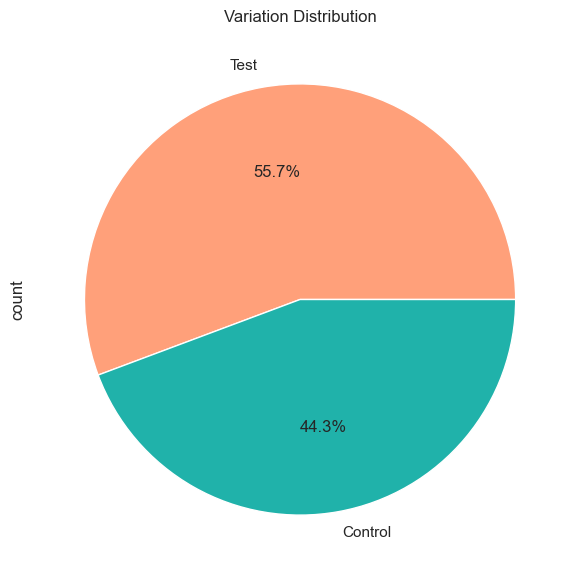

In [18]:
# pie chart to show the distribution of the variation
plt.figure(figsize=(10, 7))
df_demo['variation'].value_counts(dropna=False).plot.pie(autopct='%1.1f%%',colors=['#FFA07A', '#20B2AA', '#87CEFA'])
plt.title('Variation Distribution')
plt.show()

## Checking the correlation between numerical variables

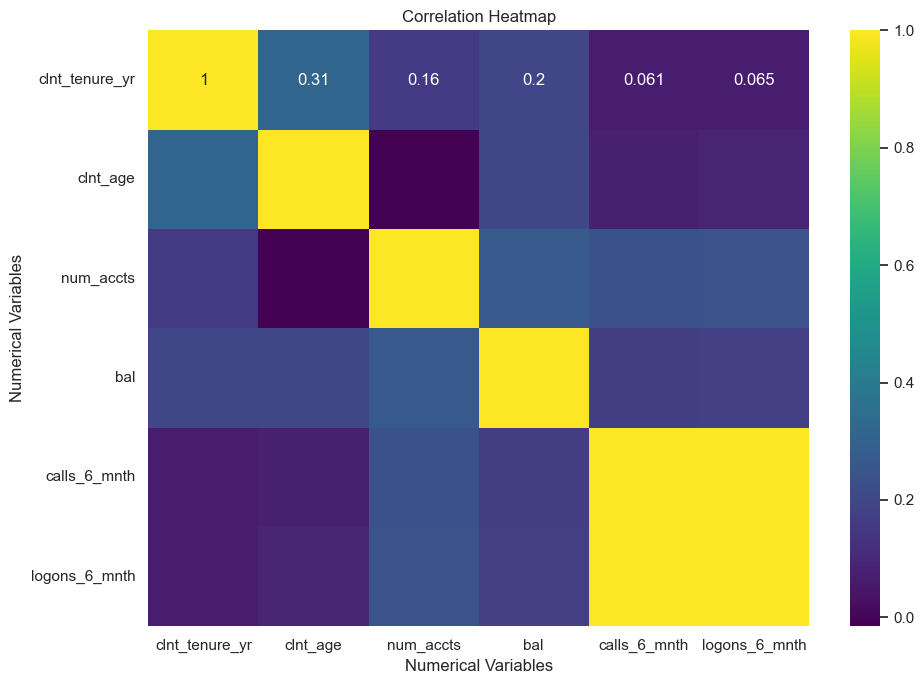

In [27]:
# use heatmap to show the correlation between the numerical variables, clnt_tenure_yr, clnt_tenure_mnth, clnt_age, num_accts, bal, calls_6_mnth, logons_6_mnth
plt.figure(figsize=(10, 7))
sns.heatmap(df_demo[['clnt_tenure_yr', 'clnt_age', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']].corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')

# add labels
plt.xlabel('Numerical Variables')
plt.ylabel('Numerical Variables')

# add correlation values
plt.tight_layout()




### Explain the result
The heatmap shows that there is a strong correlation between the number of accounts and the balance.

There is also a moderate correlation between the number of calls in the last 6 months and the number of logons in the last 6 months.


The heatmap shows the correlation between the numerical variables. The correlation ranges from -1 to 1.


A correlation of 1 indicates a perfect positive correlation, while a correlation of -1 indicates a perfect negative correlation.



In [30]:
df_demo['num_accts'].unique()

array([ 2.,  3.,  4.,  5.,  6., nan,  7.,  1.])

In [32]:
df_demo.isnull().sum()

client_id             0
date_time             0
variation             0
clnt_tenure_yr      120
clnt_tenure_mnth    120
clnt_age            120
gendr               120
num_accts           120
bal                 120
calls_6_mnth        120
logons_6_mnth       120
dtype: int64

In [31]:
# Remove rows with NaN values
df_demo_clean = df_demo.dropna()

# Calculate Pearson correlation
corr, p = pearsonr(df_demo_clean['num_accts'], df_demo_clean['bal'])
corr, p


(0.26419059320397537, 0.0)

In [34]:
# explain the pearson value
if corr > 0.5:
    print('The correlation between the number of accounts and balance is strong')
elif corr > 0.3:
    print('The correlation between the number of accounts and balance is moderate')
else:
    print('The correlation between the number of accounts and balance is weak')
    

The correlation between the number of accounts and balance is weak


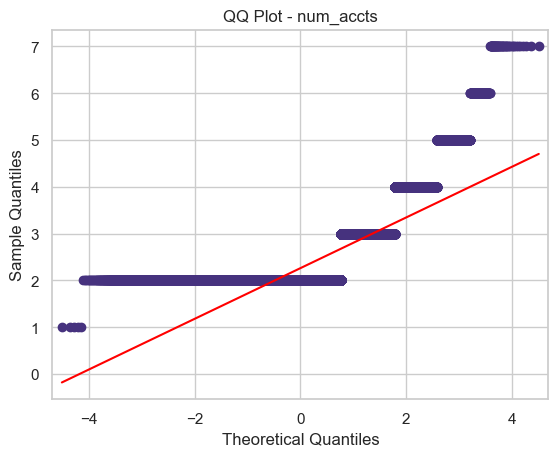

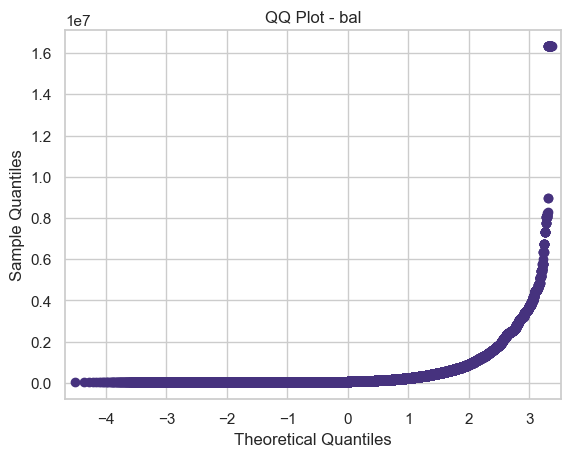

In [37]:
# use QQ plot to check the normality of the num_accts and bal
import statsmodels.api as sm

sm.qqplot(df_demo_clean['num_accts'], line='s')
plt.title('QQ Plot - num_accts')
plt.show()

# QQ plot for bal
sm.qqplot(df['bal'], line='s')
plt.title('QQ Plot - bal')
plt.show()


# KPIS

## Caculate the completion rate by counting how many confirm by client_id

## MAP PROCESS_STEP TO A NUMBER

In [ ]:

# add a new column to show the number of steps
df_web_data['num_steps'] = df_web_data['process_step'].map({'start':0, 'step_1':1, 'step_2':2, 'step_3':3, 'confirm':4})

In [ ]:
df_web_data

In [ ]:
# df_web_date sorted by client_id and date
df_web_data = df_web_data.sort_values(by=['client_id', 'date_time'])

In [ ]:
df_web_data

## ADD THE TIME SPEND ON EACH STEP

In [ ]:

# organzie the data by date_time
df_web_data['date_time'] = pd.to_datetime(df_web_data['date_time'])

df_web_data

In [ ]:
#calculate the time difference by client_id
df_web_data['time_diff'] = np.where(df_web_data['visit_id'] != df_web_data['visit_id'].shift(1), 0, df_web_data.sort_values(['client_id', 'date_time']).groupby('client_id')['date_time'].diff().dt.total_seconds().fillna(0))

In [ ]:
# add time spend column which is time_diff move up by one row
df_web_data['time_spend'] = df_web_data.groupby(["visit_id"])['time_diff'].shift(-1)

In [ ]:
pd.set_option('display.max_rows', 120)
df_web_data[df_web_data['client_id'] == 3825423]

In [ ]:
df_web_data

In [ ]:
# show how many num_steps 4 each client_id
df_web_data[df_web_data['num_steps'] == 4]['client_id'].value_counts()

# show when client_id has num_steps 4 more than once
df_web_data[df_web_data['num_steps'] == 4]['client_id'].value_counts().value_counts()

In [ ]:
# check the client_id who has num_steps 4 has 19 times


In [ ]:
# filter num_steps is 4
data_confirm = df_web_data[df_web_data['num_steps'] == 4]
data_confirm['time_spend'].value_counts()


In [ ]:
# create a grouped bar chart to show the time spend on each step by variation
df_web_data_grouped = df_web_data.groupby(['Variation', 'num_steps'])['time_spend'].mean().reset_index()
df_web_data_grouped




In [ ]:
# using seaborn catplot to create a grouped bar chart
sns.catplot(x='num_steps', y='time_spend', hue='Variation', data=df_web_data_grouped, kind='bar', height=6, aspect=2, palette = 'viridis')
plt.title('Time Spend on Each Step by Variation')
plt.xticks([0, 1, 2,3, 4], ['start','step 1', 'step 2', 'step 3', 'confirm'])
plt.show()


In [ ]:
# each client the average time spend on each step by variation
df_web_data_grouped_client = df_web_data.groupby(['Variation', 'client_id', 'num_steps'])['time_spend'].mean().reset_index()
df_web_data_grouped_client

# make a grouped bar chart to show the average time spend on each step by variation
sns.catplot(x='num_steps', y='time_spend', hue='Variation', data=df_web_data_grouped_client, kind='bar', height=6, aspect=2, palette = 'viridis')
plt.title('Average Time Spend on Each Step by Variation')
plt.xticks([0, 1, 2,3, 4], ['start','step 1', 'step 2', 'step 3', 'confirm'])
plt.show()

# Mark the error

In [ ]:
# add the error column to the data
df_web_data['error'] = np.where((df_web_data['visit_id'] == df_web_data['visit_id'].shift(1)) & (df_web_data['num_steps'] <= df_web_data['num_steps'].shift(1)), 'error', 'nan')

In [ ]:
# checking this id and sort it by date_time 
df_web_data[df_web_data['client_id'] == 8290360]

In [ ]:
pd.set_option('display.max_rows', 120)
df_web_data[df_web_data['client_id'] == 1336]

In [ ]:
# show a countplot of the error column by variation
sns.countplot(x='error', data=df_web_data, hue='Variation', palette='viridis')

In [ ]:
# show error by num_steps and variation
df_web_data_error = df_web_data[df_web_data['error'] == 'error']
df_web_data_error_grouped = df_web_data_error.groupby(['Variation', 'num_steps'])['error'].count().reset_index()
df_web_data_error_grouped

In [ ]:
# using seaborn catplot to create a grouped bar chart
sns.catplot(x='num_steps', y='error', hue='Variation', data=df_web_data_error_grouped, kind='bar', height=6, aspect=2, palette = 'viridis')
plt.title('Error by Step and Variation')
plt.xticks([0, 1, 2,3, 4], ['start','step 1', 'step 2', 'step 3', 'confirm'])
plt.show()

In [ ]:
# group the data by client_id and variation ig client_id is in the top 50
df_web_data[df_web_data['client_id'].isin(df_client_id['client_id'])].groupby(['client_id', 'Variation']).size()



In [ ]:
# check how many unique client_id and group by variation
df_web_data.groupby('Variation')['client_id'].nunique()

## the defination of completion rate 
1. when a client has reach the confirm step, counts 1 ti

In [ ]:
df_web_data

In [ ]:
# only consider the client_id that num_steps is 4 count for completion rate, show the completion rate by variation to see which variation has the highest completion rate
df_web_data_confirm = df_web_data[df_web_data['num_steps'] == 4]
df_web_data_confirm_grouped = df_web_data_confirm.groupby('Variation')['client_id'].nunique().reset_index()
df_web_data_confirm_grouped['total'] = df_web_data_confirm_grouped['client_id'].sum()
df_web_data_confirm_grouped['completion_rate'] = df_web_data_confirm_grouped['client_id']/df_web_data_confirm_grouped['total']
df_web_data_confirm_grouped


In [ ]:
# Calculate the number of client_id with num_steps equal to 4
num_steps_4 = completion_rate_table[completion_rate_table[0] == 4].groupby('Variation')['client_id'].nunique()

# Calculate the number of client_id without num_steps equal to 4
num_steps_not_4 = completion_rate_table[completion_rate_table[0] != 4].groupby('Variation')['client_id'].nunique()

# Combine the results into a DataFrame
result = pd.DataFrame({'num_steps_4': num_steps_4, 'num_steps_not_4': num_steps_not_4})

result



In [ ]:
# use pie chart to show the completion rate by variation
plt.figure(figsize=(10, 7))
df_web_data_confirm_grouped['completion_rate'].plot.pie(autopct='%1.1f%%',colors=['#FFA07A', '#20B2AA', '#87CEFA'])
plt.title('Completion Rate by Variation')
plt.show()

In [ ]:
# counting num_steps 4 by client id and variation to a dataframe
completion_rate_table = df_web_data[df_web_data['num_steps'] == 4].groupby(['client_id', 'Variation']).size().reset_index()

completion_rate_table


In [ ]:
# order by the counts of num_steps 4 in completion rate table
completion_rate_table.sort_values(by=[0], ascending=False)


In [ ]:
# create a pie chart to show the completion rate of each variation
plt.figure(figsize=(10, 7))
completion_rate_table['Variation'].value_counts(dropna=False).plot.pie(autopct='%1.1f%%',colors=['#FFA07A', '#20B2AA', '#87CEFA'])
plt.title('Completion Rate of Each Variation')
plt.show()

In [ ]:
contingency_table = pd.crosstab(completion_rate_table['Variation'], completion_rate_table['client_id'])
contingency_table

In [ ]:
from scipy.stats import chi2_contingency


# create the hypothesis 
# H0: The completion rate in the test group is <= to the control group.
# H1: The completion rate in the test group is significantly > the control group.

# Create a contingency table
contingency_table = pd.crosstab(completion_rate_table['Variation'], completion_rate_table['client_id'])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the p-value
print(p_value)


In [ ]:
# Set the significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("The completion rate in the test group is significantly higher than the control group.")
else:
    print("The completion rate in the test group is not significantly higher than the control group.")

The introduction of a new UI design comes with its associated costs: design, development, testing, potential training for staff, and possible short-term disruptions or adjustments for users. To justify these costs, Vanguard has determined that any new design should lead to a minimum increase in the completion rate to be deemed cost-effective.

Threshold: Vanguard has set this minimum increase in completion rate at 5%. This is the rate at which the projected benefits, in terms of increased user engagement and potential revenue, are estimated to outweigh the costs of the new design.

You are required to carry out another analysis, ensuring that the observed increase in completion rate from the A/B test meets or exceeds this 5% threshold. If the new design doesn’t lead to at least this level of improvement, it may not be justifiable from a cost perspective, regardless of its statistical significance.

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# H0 : The completion rate in the test group is <= 5% the control group 
# H1 : The completion rate in the test group is > 5% the control group

# Calculate the completion rate for the control group
control_completion_rate = completion_rate_table[completion_rate_table['Variation'] == 'Control']['client_id'].nunique() / contingency_table.shape[0]

# Calculate the completion rate for the test group
test_completion_rate = completion_rate_table[completion_rate_table['Variation'] == 'Test']['client_id'].nunique() / contingency_table.shape[0]

# Calculate the observed difference in completion rates
observed_difference = test_completion_rate - control_completion_rate

# Perform a hypothesis test (two-sample proportion test)

# Set the counts and nobs for the control and test groups
control_counts = contingency_table.loc['Control'].values
# Perform a chi-square test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Compare the p-value to the significance level (alpha)
alpha = 0.05

if p_value < alpha:
    print("The test group has a statistically significant higher completion rate than the control group.")
else:
    print("The test group does not have a statistically significant higher completion rate than the control group.")

# Print the observed difference and p-value
print("Observed Difference:", observed_difference)
print("p-value:", p_value)

Design Effectiveness
Was the experiment well-structured?

Were clients randomly and equally divided between the old and new designs?

Were there any biases?

Duration Assessment
Was the timeframe of the experiment (from 3/15/2017 to 6/20/2017) adequate to gather meaningful data and insights?

Additional Data Needs
What other data, if available, could enhance the analysis?




In [ ]:
# check the client distribution by variation
df_web_data.groupby('Variation')['client_id'].nunique()
